In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# import the data
dataset = pd.read_parquet('./ourdata/drifting_dataset_session_798911424.parquet')
dataset

,stimulus_presentation_id,unit_id,orientation,temporal_frequency,spikes_per_second,area
0,3798,951088664,0.0,15.0,12.489571,APN
1,3798,951088679,0.0,15.0,11.989988,APN
2,3798,951088721,0.0,15.0,12.489571,APN
3,3798,951088823,0.0,15.0,0.999166,APN
4,3798,951088862,0.0,15.0,38.967462,APN
...,...,...,...,...,...,...
396805,49432,951117127,180.0,1.0,11.490348,VISrl
396806,49432,951117252,180.0,1.0,10.990768,LP
396807,49432,951117258,180.0,1.0,2.997482,LP
396808,49432,951117264,180.0,1.0,10.491187,LP


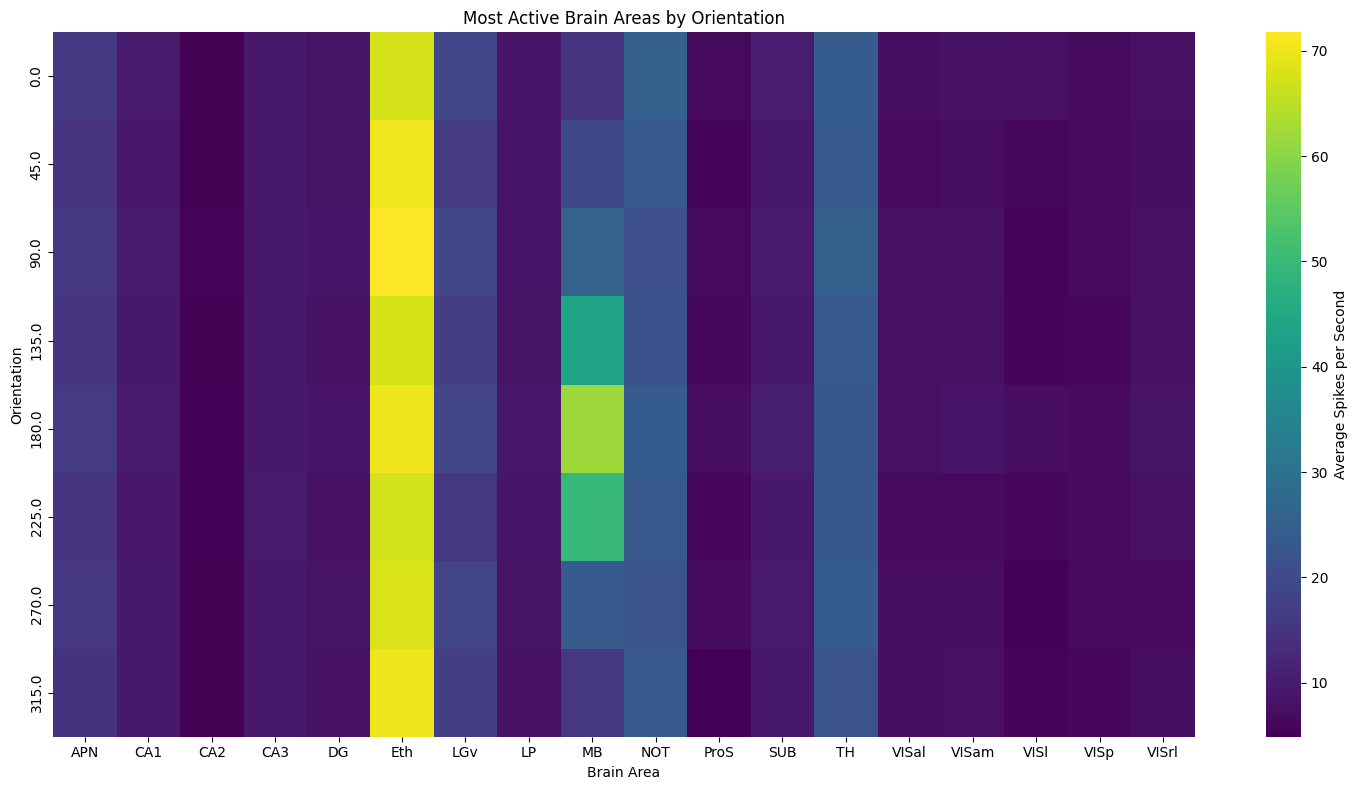

In [9]:
# Group by orientation and calculate the average spikes_per_second for each area
grouped_orientation = dataset.groupby(['orientation', 'area'])['spikes_per_second'].mean().reset_index()

# Pivot the data for easier visualization
pivot_orientation = grouped_orientation.pivot_table(index='orientation', columns='area', values='spikes_per_second', fill_value=0)

# Plot the heatmap for orientation
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_orientation, cmap='viridis', annot=False, cbar_kws={'label': 'Average Spikes per Second'})
plt.title('Most Active Brain Areas by Orientation')
plt.xlabel('Brain Area')
plt.ylabel('Orientation')
plt.tight_layout()
plt.show()

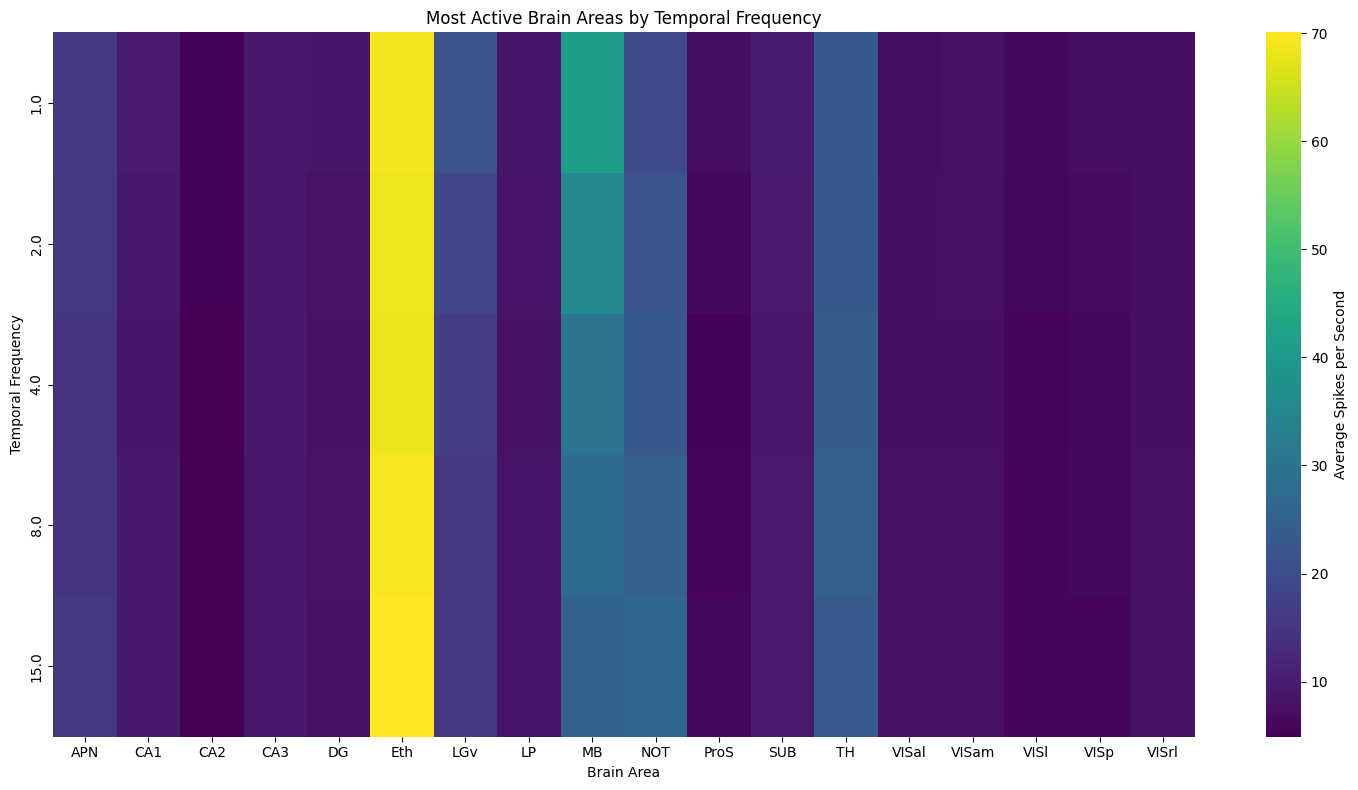

In [10]:
# Group by temporal_frequency and calculate the average spikes_per_second for each area
grouped_frequency = dataset.groupby(['temporal_frequency', 'area'])['spikes_per_second'].mean().reset_index()

# Pivot the data for easier visualization
pivot_frequency = grouped_frequency.pivot_table(index='temporal_frequency', columns='area', values='spikes_per_second', fill_value=0)

# Plot the heatmap for temporal frequency
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_frequency, cmap='viridis', annot=False, cbar_kws={'label': 'Average Spikes per Second'})
plt.title('Most Active Brain Areas by Temporal Frequency')
plt.xlabel('Brain Area')
plt.ylabel('Temporal Frequency')
plt.tight_layout()
plt.show()